In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Goal :

- New column → sucess/fail ratio → which articles have high success, high failure. 
- color gradient based on success, failure. 
- Correlation categories, successes failures. 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from itertools import chain
from collections import Counter

from src.data.some_dataloader import *

In this notebook we will: 
- find how often each article is used in the Wikispeedia game (i.e. how many times each article was clicked on)
- find articles that are most/least used 
- link each article to its category 
- find most used categories

# Import data 

In [37]:
articles = load_articles_dataframe()
categories = load_categories_dataframe()
finished_paths = load_path_finished_dataframe()
unfinished_paths = load_path_unfinished_distance_dataframe()

In [38]:
articles

,articles
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,%C3%85land
2,%C3%89douard_Manet
3,%C3%89ire
4,%C3%93engus_I_of_the_Picts
...,...
4599,Zionism
4600,Zirconium
4601,Zoroaster
4602,Zuid-Gelders


In [39]:
categories

,articles,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists
...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements
5200,Zoroaster,subject.People.Religious_figures_and_leaders
5201,Zuid-Gelders,subject.Geography.European_Geography
5202,Zuid-Gelders,subject.Language_and_literature.Languages


In [40]:
finished_paths

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


In [41]:
unfinished_paths

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


# Usage of articles

In [42]:
paths = pd.concat([finished_paths["path"], unfinished_paths["path"]])

paths_merged = paths.apply(lambda row: row.split(';'))

clicks_list = paths_merged.values.flatten().tolist()
clicks_list = list(chain.from_iterable(clicks_list))

print(f'there are {len(clicks_list)} clicks in the whole whikispeedia dataset (both finished and unfinished paths)')

there are 476073 clicks in the whole whikispeedia dataset (both finished and unfinished paths)


### View Click count of articles from article list

In [10]:
article_list = list(articles['articles'])

# count number of occurences of each article
counts = Counter(clicks_list)
occurences = {item: counts[item] for item in article_list}

df_articles_count = pd.DataFrame(list(occurences.items()), columns = ['articles', 'click_count']).set_index('articles') # df containing the click counts for each article
df_articles_count.index.name = None
df_articles_count

,click_count
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,0
%C3%85land,4
%C3%89douard_Manet,7
%C3%89ire,13
%C3%93engus_I_of_the_Picts,0
...,...
Zionism,27
Zirconium,34
Zoroaster,20
Zuid-Gelders,10


### Compute success/failure ratio

We first start by computing two related metrics tp s

success_ratio = $\frac{Succesful Clicks}{Total Clicks}$ 

failre_ratio = $\frac{Failure Clicks}{Total Clicks}$ 


In [43]:
# extract articles from the finished paths and put them in a list as new column
finished_paths['articles'] = {} 
finished_paths['articles'] = finished_paths['path'].astype(str).str.split(';')
finished_paths
        

,hashedIpAddress,timestamp,durationInSec,path,rating,articles
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,"[14th_century, 15th_century, 16th_century, Pac..."
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,"[14th_century, Europe, Africa, Atlantic_slave_..."
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,"[14th_century, Niger, Nigeria, British_Empire,..."
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,"[14th_century, Renaissance, Ancient_Greece, Gr..."
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,"[14th_century, Italy, Roman_Catholic_Church, H..."
...,...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN,"[Yagan, Ancient_Egypt, Civilization]"
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0,"[Yagan, Folklore, Brothers_Grimm, <, 19th_cent..."
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN,"[Yagan, Australia, England, France, United_Sta..."
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0,"[Yarralumla%2C_Australian_Capital_Territory, A..."


In [12]:
# do the same for the unfinished paths
unfinished_paths['articles'] = {}
unfinished_paths['articles'] = unfinished_paths['path'].astype(str).str.split(';')
unfinished_paths

,hashedIpAddress,timestamp,durationInSec,path,target,type,articles
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout,[Obi-Wan_Kenobi]
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout,[Julius_Caesar]
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout,"[Malawi, Democracy, Alexander_the_Great]"
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart,[Paraguay]
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout,"[Paraguay, Bolivia]"
...,...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart,"[Franz_Kafka, Tuberculosis, World_Health_Organ..."
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart,[Modern_history]
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout,"[Computer_programming, Linguistics, Culture, P..."
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout,"[Jamaica, United_Kingdom, World_War_II, Battle..."


#### Considering all clicks 

In [44]:
all_articles = [article for sublist in finished_paths['articles'] for article in sublist]
total_counts = Counter(all_articles)

successful_articles = [
    article for sublist in finished_paths['articles'] for article in sublist
]
successful_counts = Counter(successful_articles)


article_data_s = [
    {
        'article': article,
        'click_count': total_counts[article],
        'success_count': successful_counts[article],
        'success_ratio': successful_counts[article] / total_counts[article]
    }
    for article in total_counts
]

success_ratios_df = pd.DataFrame(article_data_s).sort_values(by='click_count', ascending=False).reset_index(drop=True)
success_ratios_df


,article,click_count,success_count,success_ratio
0,<,20561,20561,1.0
1,United_States,8896,8896,1.0
2,Europe,4362,4362,1.0
3,United_Kingdom,3904,3904,1.0
4,England,3332,3332,1.0
...,...,...,...,...
4165,Introduction_to_special_relativity,1,1,1.0
4166,Six-party_talks_concerning_North_Korea%27s_nuc...,1,1,1.0
4167,Anton%C3%ADn_Dvo%C5%99%C3%A1k,1,1,1.0
4168,Colditz_Castle,1,1,1.0


#### Getting Unique Clicks in paths.

If player passes 3 times by 'England' article, it should only be counted once in the successful/uns

In [15]:
def get_unique_counts(paths):
    unique_counts = Counter()
    for path_articles in paths['articles']:
        unique_articles = set(path_articles)
        unique_counts.update(unique_articles)
    return unique_counts


successful_unique_counts = get_unique_counts(finished_paths[finished_paths['rating'].notna()])

# calculate differences for successful paths
article_data_s_unique = [
    {
        'article': article,
        'total_click_count': total_counts[article],
        'unique_success_count': successful_unique_counts[article],
        'duplicates_in_success': total_counts[article] - successful_unique_counts[article]
    }
    for article in total_counts
]

success_duplicates_df = pd.DataFrame(article_data_s_unique).sort_values(by='total_click_count', ascending=False)
success_duplicates_df


,article,total_click_count,unique_success_count,duplicates_in_success
39,<,20561,4935,15626
24,United_States,8896,4786,4110
9,Europe,4362,2333,2029
303,United_Kingdom,3904,2189,1715
85,England,3332,1746,1586
...,...,...,...,...
4131,Introduction_to_special_relativity,1,0,1
3756,Six-party_talks_concerning_North_Korea%27s_nuc...,1,0,1
4099,Anton%C3%ADn_Dvo%C5%99%C3%A1k,1,0,1
3775,Colditz_Castle,1,0,1


In [16]:
unsuccessful_articles = [
    article for sublist in unfinished_paths['articles'] for article in sublist
]
unsuccessful_counts = Counter(unsuccessful_articles)

article_data_f = [
    {
        'article': article,
        'click_count': total_counts[article],
        'failure_count' : unsuccessful_counts[article],
        'failure_ratio': unsuccessful_counts[article] / total_counts[article]
    }
    for article in total_counts
]

unsuccess_ratios_df = pd.DataFrame(article_data_f).sort_values(by='click_count', ascending=False).reset_index(drop=True)
unsuccess_ratios_df


,article,click_count,failure_count,failure_ratio
0,<,20561,12907,0.627742
1,United_States,8896,3553,0.399393
2,Europe,4362,1249,0.286337
3,United_Kingdom,3904,1424,0.364754
4,England,3332,1226,0.367947
...,...,...,...,...
4165,Introduction_to_special_relativity,1,0,0.000000
4166,Six-party_talks_concerning_North_Korea%27s_nuc...,1,0,0.000000
4167,Anton%C3%ADn_Dvo%C5%99%C3%A1k,1,5,5.000000
4168,Colditz_Castle,1,0,0.000000


In [17]:
all_paths = pd.concat([finished_paths["path"], unfinished_paths["path"]])
all_paths_merged = all_paths.apply(lambda row: row.split(';'))

clicks_list = list(chain.from_iterable(all_paths_merged.values.tolist()))
total_click_counts = Counter(clicks_list)

def unique_click_counter(paths):
    unique_counts = Counter()
    for path in paths:
        unique_articles = set(path.split(';')) 
        unique_counts.update(unique_articles)
    return unique_counts

successful_unique_counts = unique_click_counter(finished_paths["path"])
unsuccessful_unique_counts = unique_click_counter(unfinished_paths["path"])

data = []

for article in article_list:
    total_click_count = total_click_counts[article]
    unique_success_count = successful_unique_counts[article]
    unique_failure_count = unsuccessful_unique_counts[article]
    
    # calc unique total click count (unique success + unique failure)
    unique_click_count = unique_success_count + unique_failure_count
    
    # calc ratios based on both total and unique counts
    success_ratio_total = successful_unique_counts[article] / total_click_count if total_click_count > 0 else 0
    failure_ratio_total = unsuccessful_unique_counts[article] / total_click_count if total_click_count > 0 else 0
    
    success_ratio_unique = unique_success_count / unique_click_count if unique_click_count > 0 else 0
    failure_ratio_unique = unique_failure_count / unique_click_count if unique_click_count > 0 else 0

    data.append({
        'article': article,
        'total_click_count': total_click_count,
        'unique_click_count': unique_click_count,
        'unique_success_count': unique_success_count,
        'unique_failure_count': unique_failure_count,
        'success_ratio_total': success_ratio_total,
        'failure_ratio_total': failure_ratio_total,
        'success_ratio_unique': success_ratio_unique,
        'failure_ratio_unique': failure_ratio_unique
    })


df_articles_count = pd.DataFrame(data).sort_values(by='total_click_count', ascending=False).reset_index(drop=True)
df_articles_count  

,article,total_click_count,unique_click_count,unique_success_count,unique_failure_count,success_ratio_total,failure_ratio_total,success_ratio_unique,failure_ratio_unique
0,United_States,12449,12010,8675,3335,0.696843,0.267893,0.722315,0.277685
1,Europe,5611,5497,4303,1194,0.766886,0.212796,0.782791,0.217209
2,United_Kingdom,5328,5161,3807,1354,0.714527,0.254129,0.737648,0.262352
3,England,4558,4429,3261,1168,0.715445,0.256253,0.736284,0.263716
4,Earth,4216,4144,3176,968,0.753321,0.229602,0.766409,0.233591
...,...,...,...,...,...,...,...,...,...
4599,History_of_Portugal_%281777%E2%80%931834%29,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4600,History_of_Poland_%281945%E2%80%931989%29,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4601,History_of_Northwest_Territories_capital_cities,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4602,History_of_Miami%2C_Florida,0,0,0,0,0.000000,0.000000,0.000000,0.000000


In [18]:
# add "<" manually if it is not present
if "<" not in [entry['article'] for entry in data]:
    data.append({
        'article': "<",
        'total_click_count': total_click_counts.get("<", 0),
        'unique_click_count': successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0),
        'unique_success_count': successful_unique_counts.get("<", 0),
        'unique_failure_count': unsuccessful_unique_counts.get("<", 0),
        'success_ratio_total': successful_unique_counts.get("<", 0) / total_click_counts.get("<", 1) if total_click_counts.get("<", 1) > 0 else 0,
        'failure_ratio_total': unsuccessful_unique_counts.get("<", 0) / total_click_counts.get("<", 1) if total_click_counts.get("<", 1) > 0 else 0,
        'success_ratio_unique': successful_unique_counts.get("<", 0) / (successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0)) if (successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0)) > 0 else 0,
        'failure_ratio_unique': unsuccessful_unique_counts.get("<", 0) / (successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0)) if (successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0)) > 0 else 0
    })

In [19]:
# sort but avoid resetting index until verifying "<" is present
df_articles_count = pd.DataFrame(data).sort_values(by='total_click_count', ascending=False).reset_index()

df_articles_count

,index,article,total_click_count,unique_click_count,unique_success_count,unique_failure_count,success_ratio_total,failure_ratio_total,success_ratio_unique,failure_ratio_unique
0,4604,<,33468,14196,8995,5201,0.268764,0.155402,0.633629,0.366371
1,4297,United_States,12449,12010,8675,3335,0.696843,0.267893,0.722315,0.277685
2,1433,Europe,5611,5497,4303,1194,0.766886,0.212796,0.782791,0.217209
3,4293,United_Kingdom,5328,5161,3807,1354,0.714527,0.254129,0.737648,0.262352
4,1385,England,4558,4429,3261,1168,0.715445,0.256253,0.736284,0.263716
...,...,...,...,...,...,...,...,...,...,...
4600,558,Benjamin_of_Tudela,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4601,3241,Photovoltaic_array,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4602,557,Benjamin_Mountfort,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4603,550,Bench_language,0,0,0,0,0.000000,0.000000,0.000000,0.000000


# To add in results notebook

In [295]:
from functions import process_article_paths 

df_articles_count = process_article_paths(finished_paths, unfinished_paths, articles)
df_articles_count.head(10)

,article,total_click_count,unique_click_count,unique_success_count,unique_failure_count,success_ratio_total,failure_ratio_total,success_ratio_unique,failure_ratio_unique
0,<,33468,14196,8995,5201,0.268764,0.155402,0.633629,0.366371
1,United_States,12449,12010,8675,3335,0.696843,0.267893,0.722315,0.277685
2,Europe,5611,5497,4303,1194,0.766886,0.212796,0.782791,0.217209
3,United_Kingdom,5328,5161,3807,1354,0.714527,0.254129,0.737648,0.262352
4,England,4558,4429,3261,1168,0.715445,0.256253,0.736284,0.263716
5,Earth,4216,4144,3176,968,0.753321,0.229602,0.766409,0.233591
6,Africa,3590,3499,2738,761,0.762674,0.211978,0.782509,0.217491
7,World_War_II,2931,2876,2267,609,0.773456,0.207779,0.788248,0.211752
8,North_America,2594,2554,1861,693,0.717425,0.267155,0.728661,0.271339
9,Animal,2471,2373,1666,707,0.674221,0.286119,0.702065,0.297935


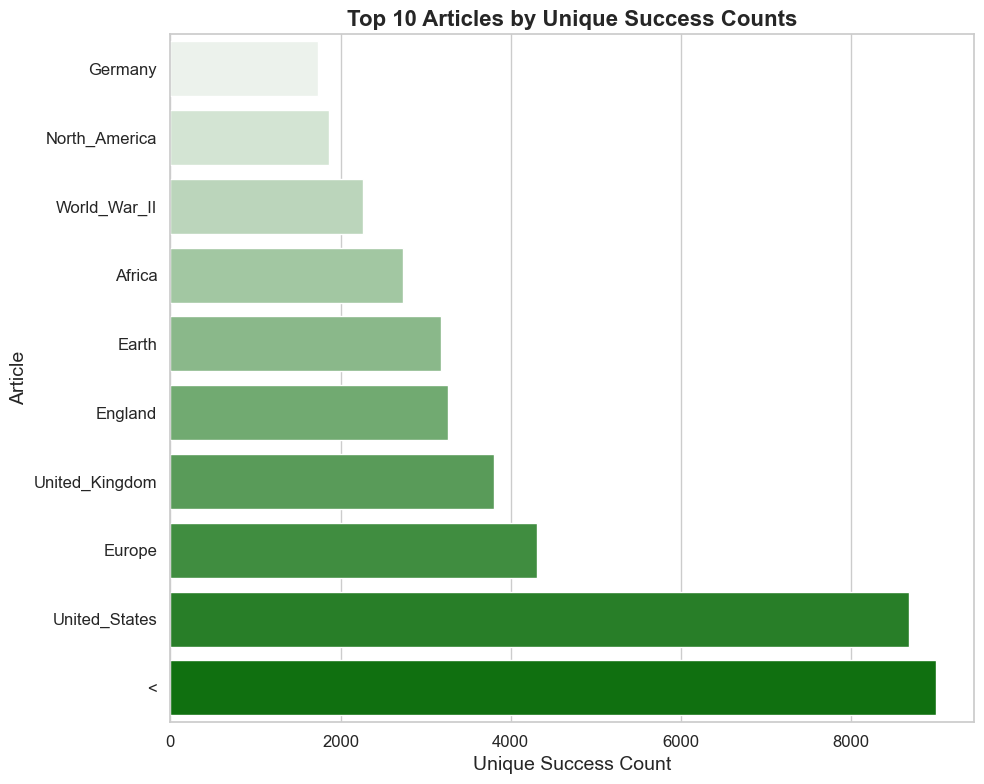

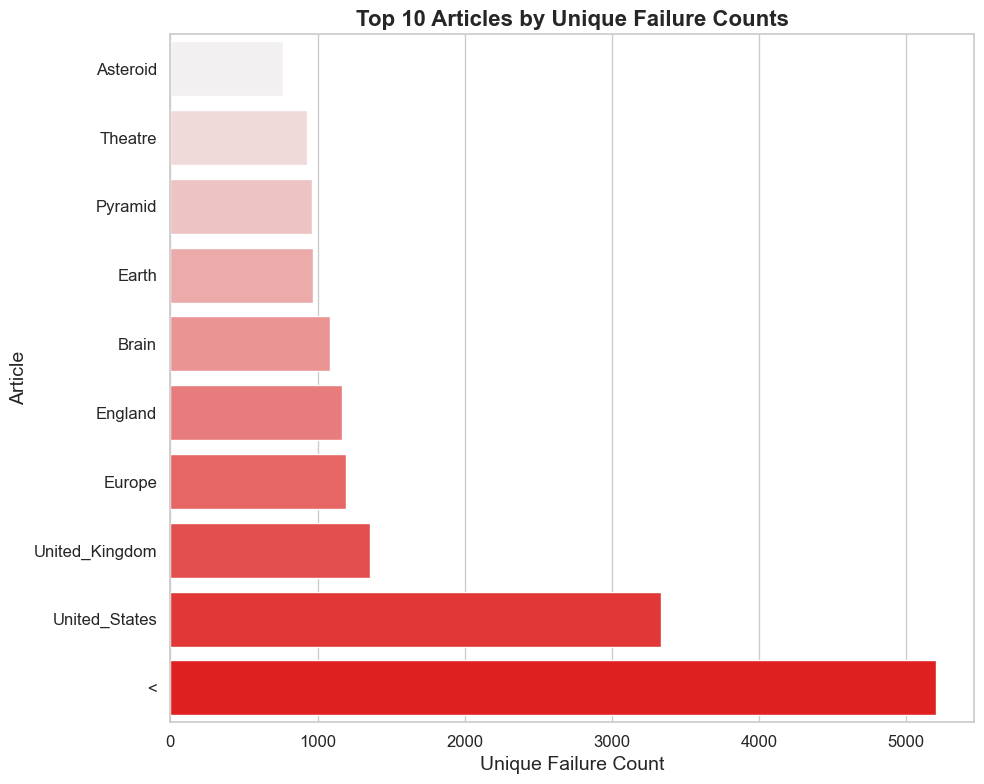

In [107]:
from plots import plot_top_k_unique_failure_success_counts

plot_top_k_unique_failure_success_counts(df_articles_count)

In [108]:
go_back_fail_count_u = df_articles_count.loc[df_articles_count['article'] == '<']['unique_failure_count'].values[0]
go_back_success_count_u = df_articles_count.loc[df_articles_count['article'] == '<']['unique_success_count'].values[0]
success_ratio_unique = go_back_success_count_u / (go_back_success_count_u + go_back_fail_count_u)
print(f'The go back button makes on average the player succeed {success_ratio_unique*100:.2f}% of the time')

The go back button makes on average the player succeed 63.36% of the time


This plot gives us a good insight about which articles make users fail/succeed in the Wikispeedia game :

**High success counts in historical/geographical articles** : <br/>
Articles `World_War_II`, `Africa`, and `Germany` appear in the success plot but not in the failure plot. This could indicate that these articles are part of well-connected paths (which we call highway paths) that users are more likely to complete, possibly because they relate to broader, interconnected topics.

**High success rate for the "go back" button** : <br/> 
The "<" button, which allows users to navigate back to a previous article, has a unique success count that is notably higher than its unique failure count, with a success rate of 63.36%. This means that when users go back, they end up completing their path about 63% of the time. The frequent use of the "go back" button suggests that users may often reach pages where they feel unsure of the next step or encounter content that does not meet their expectations, prompting them to backtrack.

While many users successfully navigate onward after going back, a substantial portion still abandons their path after backtracking. This frequent use of the "go back" button, especially before abandonment, implies that certain pages might be acting as dead ends or lacking clear onward navigation.

**High failure counts in specific articles** : <br/>
Certain articles like `Asteroid`, `Theatre`, and `Pyramid` appear only in the failure plot. These may represent topics that are less connected to other parts of the article network, potentially leading users to dead ends. Users reaching these pages may struggle to find relevant onward links, leading to abandonment. Unlike the historical and geographical articles that are well integrated into broader themes, these topics may lack sufficient links to related articles, making it difficult for users to continue their path without backtracking or giving up.

**Top articles with both high success and failure counts** : <br/>
Articles like `United_States`, `United_Kingdom`, and `Europe`, which appear very frequently in our analysis, have high counts in both success and failure plots. This suggests that these articles are pivotal points in the game where users frequently make navigation decisions. While these articles are often part of successful paths, they also lead to user abandons, possibly because of the wide range of potential links that may either facilitate continuation or create confusion.

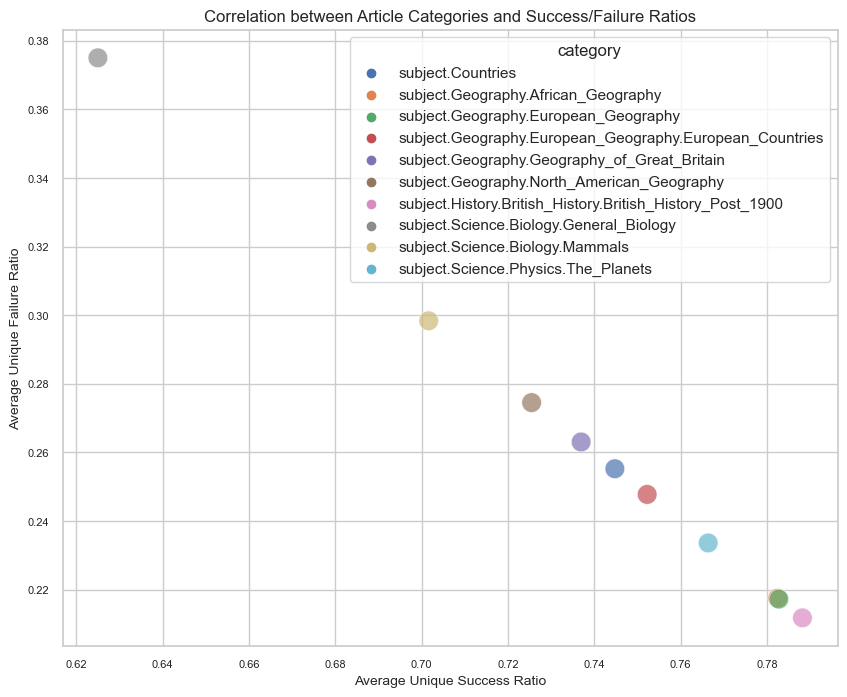

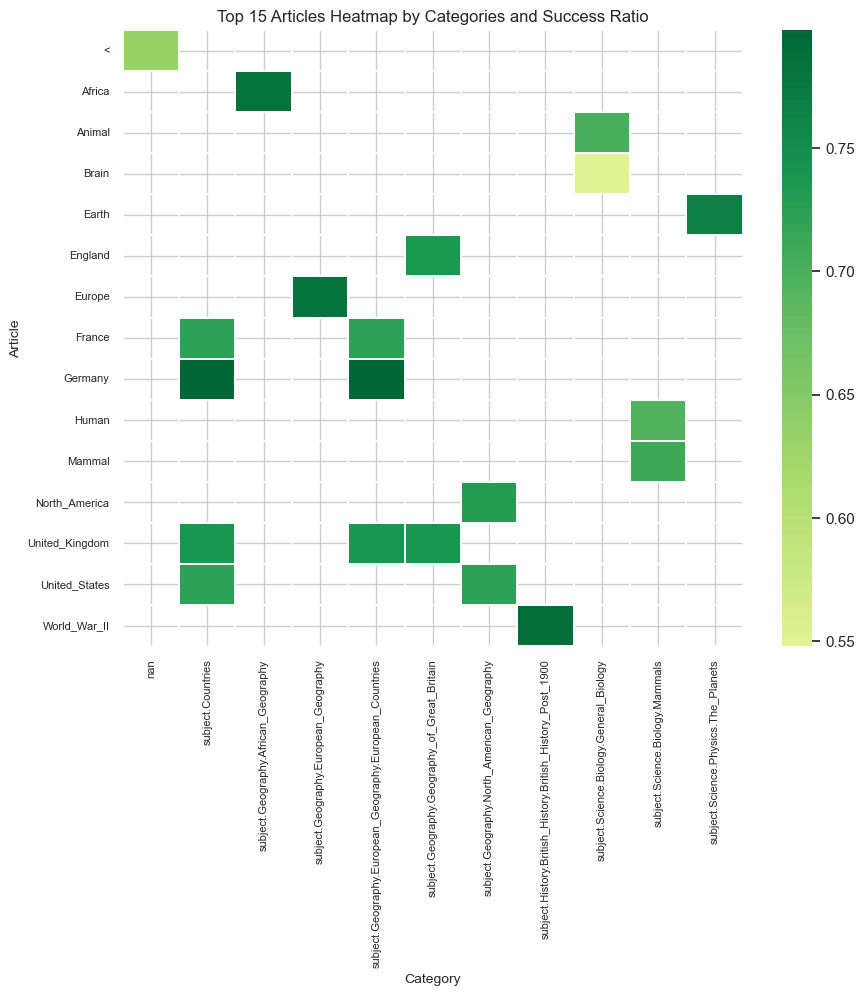

In [248]:
from plots import analyze_top_articles_by_category

analyze_top_articles_by_category(df_articles_count, categories, top_n=15)

We obverse several things on the above two plots : <br/>

**Geography-related categories** : <br/>
Geography-related categories, such as `European_Geography`, `North_American_Geography`, and `African_Geography`, have high success ratios, suggesting that geographical articles are part of well-connected paths that users complete more frequently.

**Science and biology topics** : <br/>
Categories like `Mammals`, `General_Biology` show moderate success ratios, indicating that these topics might be somewhat connected but don’t facilitate completion as effectively as geography-related paths. Surprisingly, `Physics` (more particularly, The Planets), shows a very high success ratio, suggesting that users may find it easier to follow through on paths involving specific physics topics, possibly due to greater prior knowledge or more structured/linear article content.

**High success with certain historical articles** : <br/>
Historical topics, specifically `British_History_Post_1900`, have a lower failure ratio, suggesting users tend to follow through on these articles more consistently, potentially because of potentially higher knowledge on the subject or clearer onward paths.

**Heatmap distribution** : <br/> 
The heatmap emphasizes the fact that articles in the Countries and general geography categories (`European_Geography`, `Geography_of_Great_Britain`) are strongly associated with higher success ratios, reinforcing the importance of geographical hubs in successful navigation paths.
However an article like the `Brain` has a much lower success ratio, possibly due to players' lack of knowledge on this topic or the lack/complexity of outgoing links.

### Questions
1. What articles are most likely to cause a player to stop the game? 
2. What makes those articles "dead ends"? What does this have to do with the country of these articles?
3. Does this relate to the number of out articles (links.tsv) 
4. Dernier article des unfinished paths (how many times does it appear? is it a dead end ?)

### What articles are most likely to cause a player to stop the game? 

In [138]:
df_country_clicks_links = pd.read_csv('data/country_clicks_links.csv', index_col=0)

In [237]:
# 1
# select top articles based on failure ratios and unique failure counts
top_dead_end_articles = df_articles_count.sort_values(by=['failure_ratio_unique', 'total_click_count'], ascending=False)
print("Top Dead-End Articles (Most Likely to Cause Players to Stop):")
top_dead_end_articles[['article', 'total_click_count', 'failure_ratio_unique', 'unique_failure_count']].head(10)



Top Dead-End Articles (Most Likely to Cause Players to Stop):


,article,total_click_count,failure_ratio_unique,unique_failure_count
4039,Hurricane_Gloria,4,1.0,4
4043,Hilda_of_Whitby,4,1.0,4
4078,Malwa_%28Madhya_Pradesh%29,4,1.0,4
4090,Eliminative_materialism,3,1.0,3
4105,San_Diego_and_Arizona_Railway,3,1.0,3
4111,Lynton_and_Barnstaple_Railway,2,1.0,2
4127,Battle_of_Smolensk_%281943%29,2,1.0,2
4129,Richard_O%27Connor,2,1.0,2
4150,Private_Peaceful,1,1.0,1
4156,Nadia_Com%C4%83neci,1,1.0,1


### What makes those articles "dead ends"?

In [241]:
# prepare for merge
df_country_click_links_reset = df_country_clicks_links.reset_index().rename(columns={'index': 'article'})

# merge to get the country
dead_end_countries = pd.merge(
    df_country_click_links_reset, 
    top_dead_end_articles, 
    on='article', 
    how='inner'
)

print("Top Dead-End Articles (Most Likely to Cause Players to Stop) related to link counts:")
dead_end_countries.sort_values(by=['failure_ratio_unique','total_click_count'], ascending=False)[['article', 'num_links_in', 'num_links_out', 'failure_ratio_unique']].head(10)


Top Dead-End Articles (Most Likely to Cause Players to Stop) related to link counts:


,article,num_links_in,num_links_out,failure_ratio_unique
1928,Hilda_of_Whitby,2.0,16.0,1.0
2051,Hurricane_Gloria,2.0,6.0,1.0
2624,Malwa_%28Madhya_Pradesh%29,3.0,29.0,1.0
1356,Eliminative_materialism,1.0,12.0,1.0
3619,San_Diego_and_Arizona_Railway,2.0,8.0,1.0
507,Battle_of_Smolensk_%281943%29,2.0,13.0,1.0
2577,Lynton_and_Barnstaple_Railway,3.0,11.0,1.0
3493,Richard_O%27Connor,1.0,35.0,1.0
316,Architecture_of_Windows_NT,NaN,3.0,1.0
847,CF7,2.0,6.0,1.0


These dead-end articles each have a 100% failure ratio, meaning players abandon their path every time they reach one of these pages. Many of these articles are highly specific, niche topics tied to particular historical or cultural contexts, such as `Hurricane Gloria` in the United States, `Hilda of Whitby` in early Christian England, and `Nadia Comăneci` from Romania. Despite having some incoming links, most of these pages offer limited outgoing links (such as `Architecture of Windows NT` with only 3 outgoing links), restricting the options for onward navigation. This lack of connectivity to other commonly traversed topics creates a navigational dead end, making it difficult for players to find relevant paths to continue, effectively leading to abandonment in the Wikispeedia game.

###  What does this have to do with the country of these articles?

We'd like to have unique countries in the dataframe to get a clear view of each country's overall impact as a dead-end article without redundancy.
It's important to avoid duplicate entries, which would skew metrics like total click counts and success/failure ratios. 

The following approach creates a single, summarized entry for each country, preserving meaningful metrics and avoiding arbitrary duplicate drops. It allows for a comprehensive view of each country’s overall engagement and dead-end behavior within the dataset.

In [264]:
# 2
# group by 'Top_1_name' (country) and aggregate the data
unique_dead_end_countries = (
    dead_end_countries
    .groupby('Top_1_name', as_index=False)
    .agg({
        'click_count': 'sum',             # Sum click counts to get total clicks per country
        'num_links_out': lambda x: int(round(x.sum())),          # Sum of outgoing links
        'num_links_in': lambda x: int(round(x.sum())),           # Sum of incoming links
        'unique_success_count': 'sum',    # Sum of unique success counts per country
        'unique_failure_count': 'sum',    # Sum of unique failure counts per country
        'success_ratio_total': 'mean',    # Mean of total success ratios
        'failure_ratio_total': 'mean',    # Mean of total failure ratios
        'success_ratio_unique': 'mean',   # Mean of unique success ratios
        'failure_ratio_unique': 'mean'    # Mean of unique failure ratios
    }).rename(columns={
        'num_links_out': 'sum_num_links_out',
        'num_links_in': 'sum_num_links_in',
        'success_ratio_total': 'mean_success_ratio_total',
        'failure_ratio_total': 'mean_failure_ratio_total',
        'success_ratio_unique': 'mean_success_ratio_unique',
        'failure_ratio_unique': 'mean_failure_ratio_unique'
    })
)

unique_dead_end_countries = unique_dead_end_countries.sort_values(by=['click_count'], ascending=False)

unique_dead_end_countries


,Top_1_name,click_count,sum_num_links_out,sum_num_links_in,unique_success_count,unique_failure_count,mean_success_ratio_total,mean_failure_ratio_total,mean_success_ratio_unique,mean_failure_ratio_unique
202,united states,69147,16338,15369,48485,19117,0.636390,0.253500,0.642559,0.256352
201,united kingdom,22753,3566,5145,15836,6404,0.638350,0.225409,0.642702,0.227161
71,germany,22429,5733,6393,17002,5120,0.705586,0.239628,0.710261,0.241254
87,india,19882,6238,5748,14536,4985,0.674239,0.238783,0.679818,0.240816
41,china,18823,5601,5036,13682,4796,0.704816,0.222482,0.709854,0.224356
...,...,...,...,...,...,...,...,...,...,...
142,niue,17,15,17,9,8,0.529412,0.470588,0.529412,0.470588
43,cocos (keeling) islands,16,24,18,9,7,0.562500,0.437500,0.562500,0.437500
123,mayotte,16,11,32,12,4,0.750000,0.250000,0.750000,0.250000
25,bouvet island,14,13,2,11,3,0.785714,0.214286,0.785714,0.214286


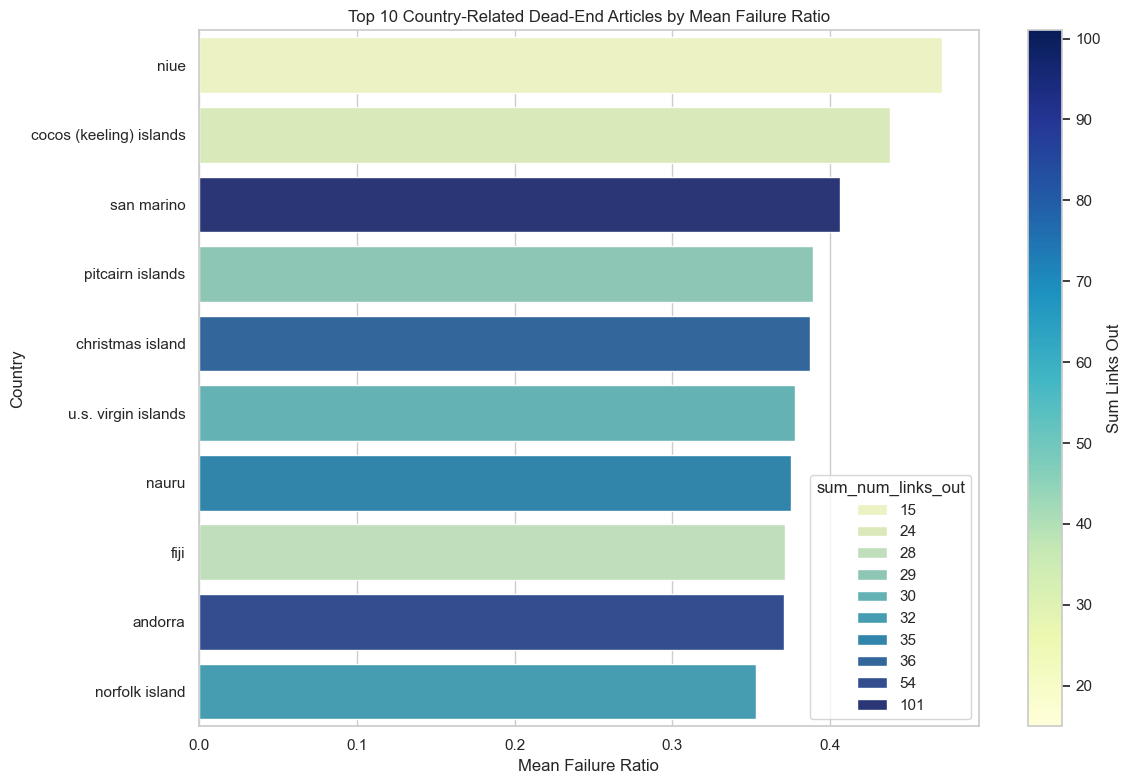

In [266]:
from plots import plot_top_dead_end_countries

plot_top_dead_end_countries(unique_dead_end_countries)

This horizontal bar plot shows top 10 country-related dead-end articles' countries ranked by their mean failure ratio.
It highlights the likelihood of players abandoning paths when they reach these country articles. Each country displayed has a relatively high mean failure ratio, indicating that players often encounter challenges in continuing their path. Interestingly and this was to be expected, some small or less well-known territories, such as Niue, Cocos (Keeling) Islands, and Pitcairn Islands, have high failure ratios despite having varying numbers of outgoing links. This suggests that even with moderate connectivity (links out), these articles fail to provide sufficient onward navigation options relevant to player goals.

The color gradient, which represents the average number of outgoing links, shows that having more outgoing links (e.g., San Marino with a high link count) **does not necessarily reduce failure rates in this case**, indicating that the relevance or connectivity of these links on more niche articles may be limited within the game's structure.

### What if we take into account the click counts?

These countries have a very low click count, what if we take into account the number of clicks ? 

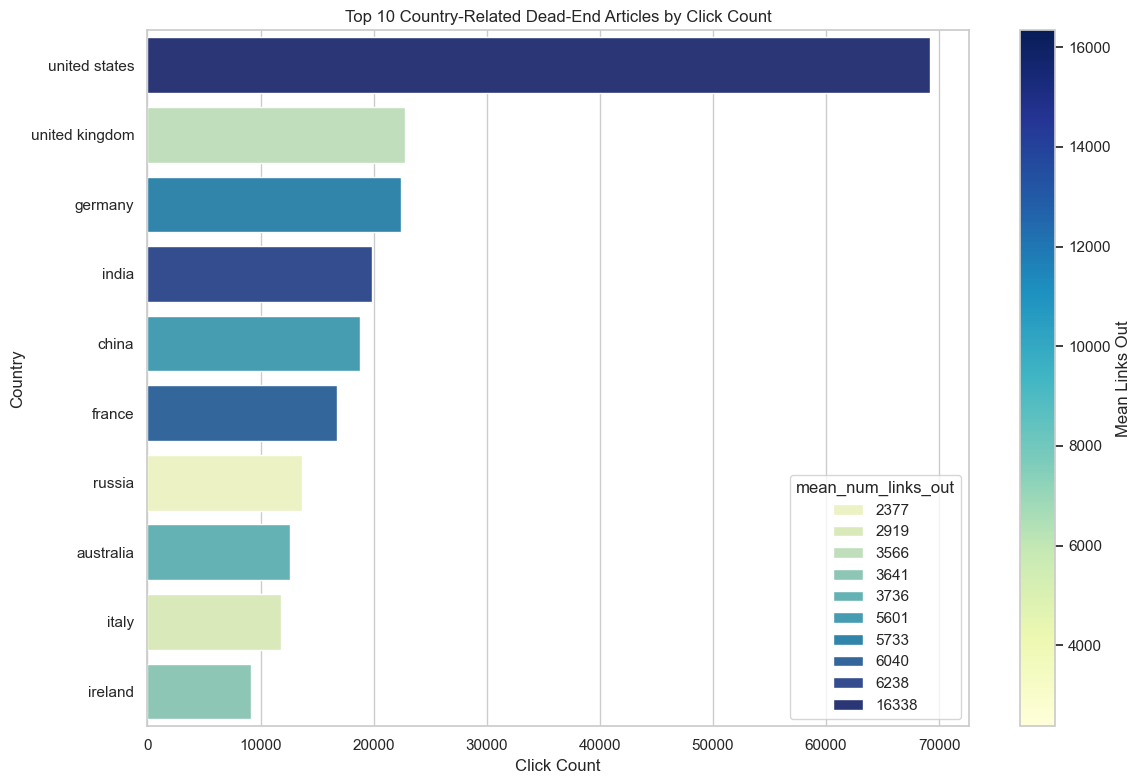

In [263]:
plot_top_dead_end_countries(unique_dead_end_countries, use_click_count=True)

Uh oh, this plot might be biased. Not only has the `United States` received an overwhelmingly high number of clicks, but it also has significantly more outgoing links sum (16338) than other countries, which likely increases its visibility and accessibility. This high connectivity makes it easier for users to encounter the United States in their paths, thereby inflating its click count relative to less-linked countries. Additionally, cultural or linguistic familiarity with certain countries, like the US or the UK might lead users to click on these articles more frequently, introducing a familiarity bias into the data.

To prevent this, we have to scale the number of clicks per country by the sum of outgoing links of those countries in the Wikipedia data. 

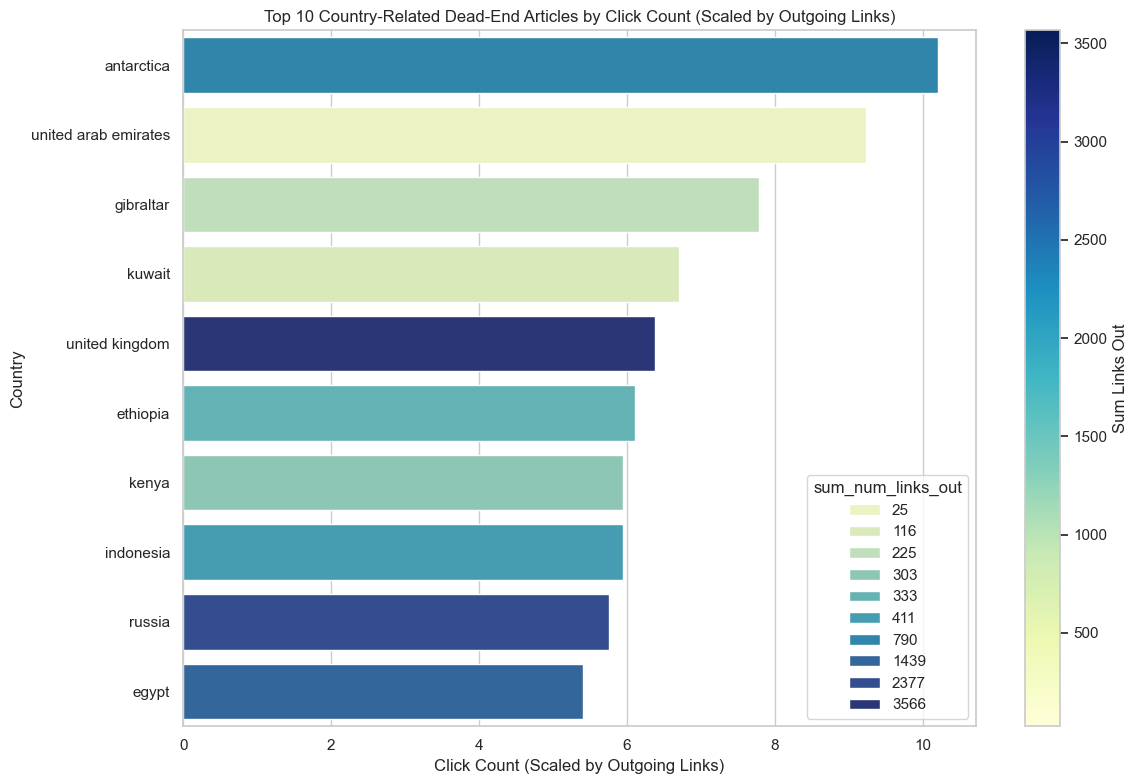

In [290]:
# Scale the click count by the mean number of outgoing links
unique_dead_end_countries["scaled_click_count"] = unique_dead_end_countries["click_count"] / unique_dead_end_countries["sum_num_links_out"]

# Plot using the updated DataFrame with scaled click count
plot_top_dead_end_countries(unique_dead_end_countries, use_click_count=True, use_scaled=True)


This is quite revealing!

- The initial plot shows a tendency for highly connected countries like the United States and United Kingdom to appear frequently as dead ends, largely due to their high number of outgoing links, which naturally draw in more clicks and interactions.
- After scaling, less connected countries (e.g., Antarctica, United Arab Emirates) come into focus, indicating that players often end up at these pages not solely because of link density but perhaps due to interest or paths that commonly lead to these locations.

Thus, scaling sheds light on genuine player navigation patterns, reducing the visibility of well-connected hubs and highlighting countries that act as dead ends even with fewer outgoing links, suggesting significant player engagement or specific interest.

### Let's analyse the last article's country of unfinished paths(how many times does it appear? is it a dead end ?)

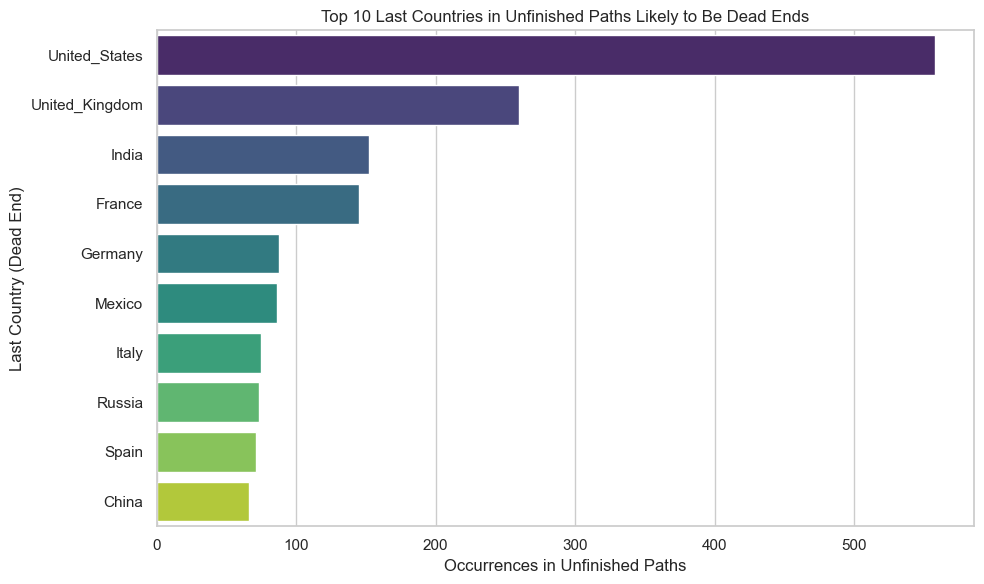

In [283]:
from plots import plot_top_last_dead_end_countries

# extract the last article (country) from each unfinished path
unfinished_paths['last_article'] = unfinished_paths['articles'].apply(lambda x: x[-1] if isinstance(x, list) and len(x) > 0 else None)

# count occurrences of each last article
last_article_counts = unfinished_paths['last_article'].value_counts().reset_index()
last_article_counts.columns = ['last_article', 'count']

# standardize format for merging by removing underscores and converting to lowercase
last_article_counts['cleaned_last_article'] = last_article_counts['last_article'].str.replace('_', ' ').str.lower()
unique_dead_end_countries['cleaned_country'] = unique_dead_end_countries['Top_1_name'].str.replace('_', ' ').str.lower()

# merge to identify last articles in unfinished paths that are also known dead-end countries
last_dead_end_countries = last_article_counts.merge(
    unique_dead_end_countries, 
    left_on='cleaned_last_article', 
    right_on='cleaned_country', 
    how='inner'
)

plot_top_last_dead_end_countries(last_dead_end_countries)

### scaled by the number of links out

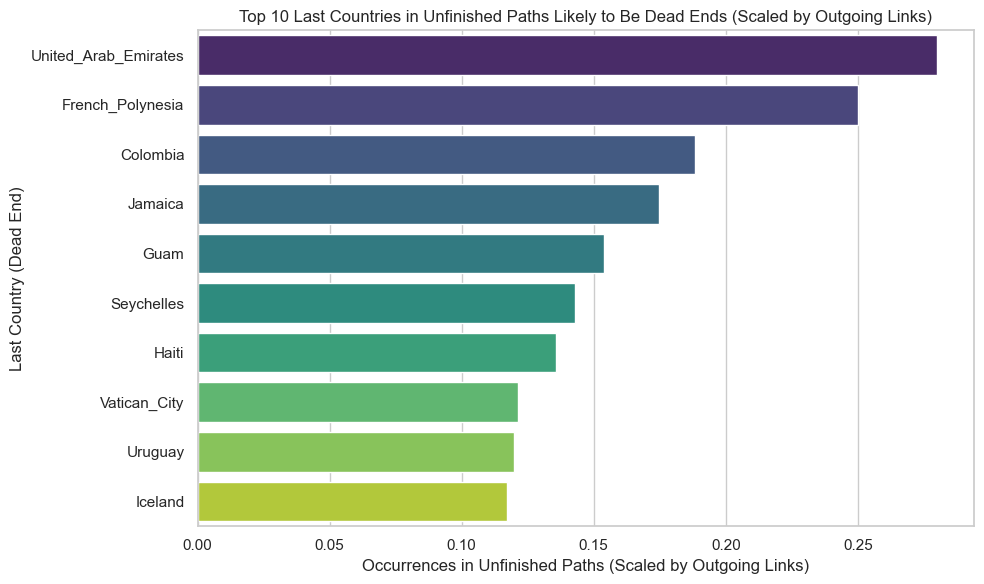

In [282]:
# calculate scaled values for plotting
last_dead_end_countries['scaled_count'] = last_dead_end_countries['count'] / last_dead_end_countries['sum_num_links_out']
plot_top_last_dead_end_countries(last_dead_end_countries, use_scaled=True)

This analysis again provides interesting insights!

- In the first plot, we see that highly connected countries like the United States and United Kingdom frequently appear as the last countries in unfinished paths, likely due to their high click count and connectivity. Their numerous outgoing links make them common endpoints when players get stuck in navigation.
- The scaled plot, however, reveals a different trend: countries with fewer outgoing links, such as the United Arab Emirates and French Polynesia, stand out as prominent dead ends. This indicates that users often land on these pages not merely due to connectivity but due to specific navigational patterns or interests that naturally lead them to these locations.

Therefore scaling shows countries that serve as genuine dead ends, even with limited outgoing links, reflecting meaningful user engagement and specific pathways within the game and failure when encountering these articles countries.

### Pushing it further : 
#### Get the count of all articles that come before the "<" and link it with the failure ratio

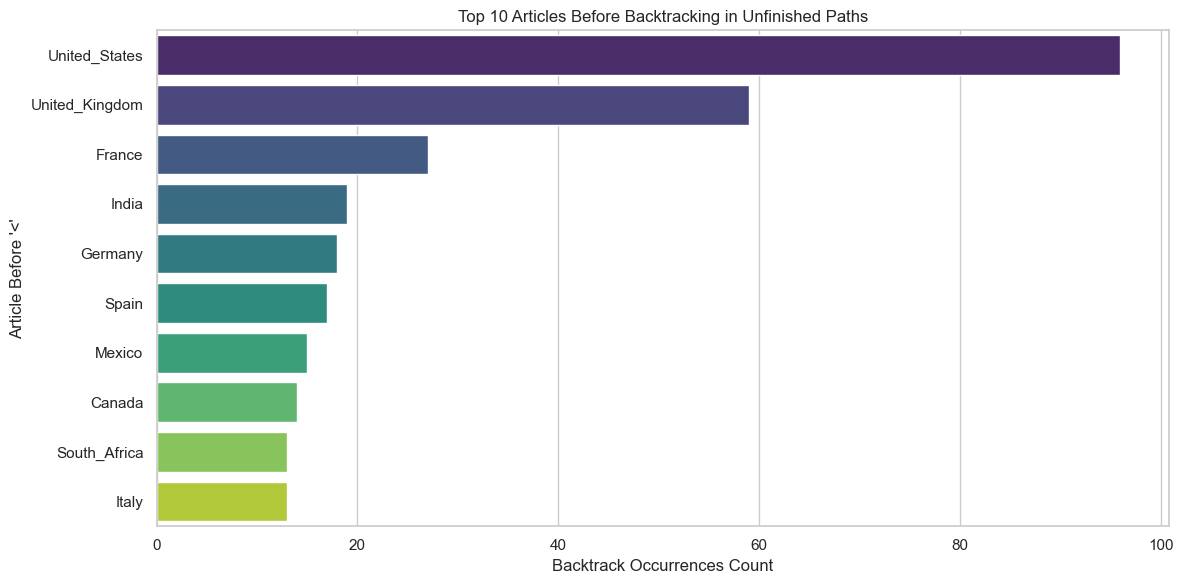

In [293]:
from functions import get_articles_before_go_back
from plots import plot_articles_before_go_back

articles_before_go_back_sorted = get_articles_before_go_back(unfinished_paths, unique_dead_end_countries)
plot_articles_before_go_back(articles_before_go_back_sorted)

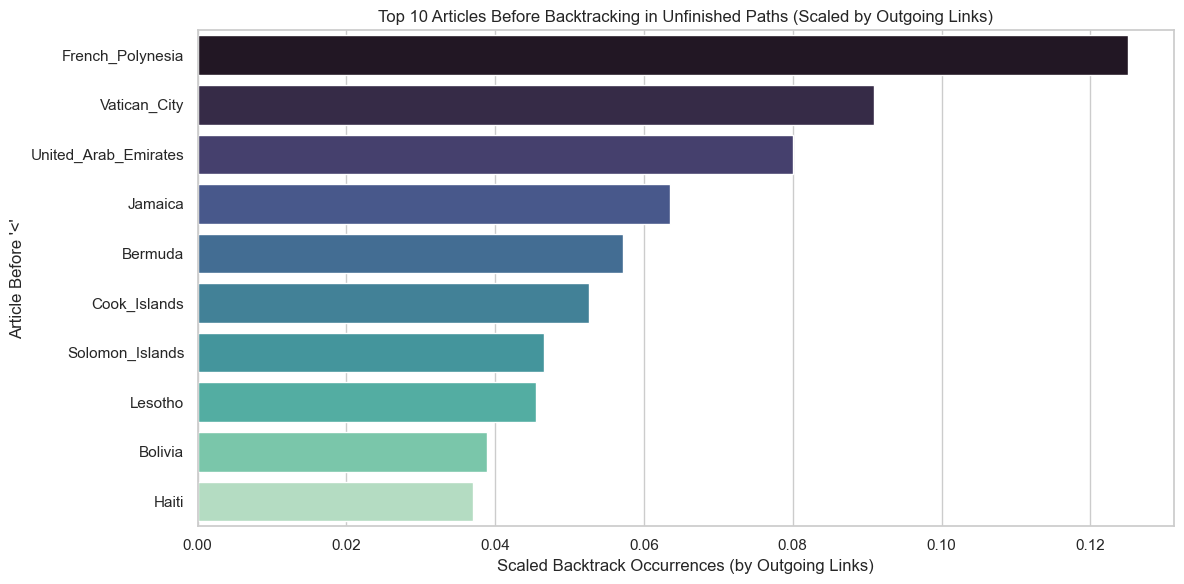

In [294]:
plot_articles_before_go_back(articles_before_go_back_sorted, use_scaled=True)

**Raw Occurrences Before Backtracking**:
- The first graph shows the most frequently encountered articles before players choose to backtrack. Highly connected countries like the United States and United Kingdom dominate this list. These articles likely serve as broad hubs, where players reach a point of indecision or difficulty, leading to backtracking.

**Scaled Occurrences (by Outgoing Links)**:
- After scaling by outgoing links, less prominent or isolated locations like French Polynesia, Vatican City, and Jamaica emerge as significant. These articles may act as dead ends due to limited onward navigational options, even if they don’t receive high raw click counts. This highlights places where players may feel stuck despite the initial attraction, indicating a need for more links or clearer paths to navigate away.

Overall, scaling reveals player patterns and difficulties in less connected areas, while the raw data underscores challenges in more popular, well-connected hubs.